In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_openml
from sklearn.manifold import TSNE

In [2]:
# Cargar el conjunto de datos MNIST
mnist = fetch_openml("mnist_784", version=1)
X, y = mnist["data"], mnist["target"]

/home/gcasas/.local/lib/python3.11/site-packages/sklearn/datasets/_openml.py:1002: FutureWarning: The default value of `parser` will change from `'liac-arff'` to `'auto'` in 1.4. You can set `parser='auto'` to silence this warning. Therefore, an `ImportError` will be raised from 1.4 if the dataset is dense and pandas is not installed. Note that the pandas parser may return different data types. See the Notes Section in fetch_openml's API doc for details.
  warn(


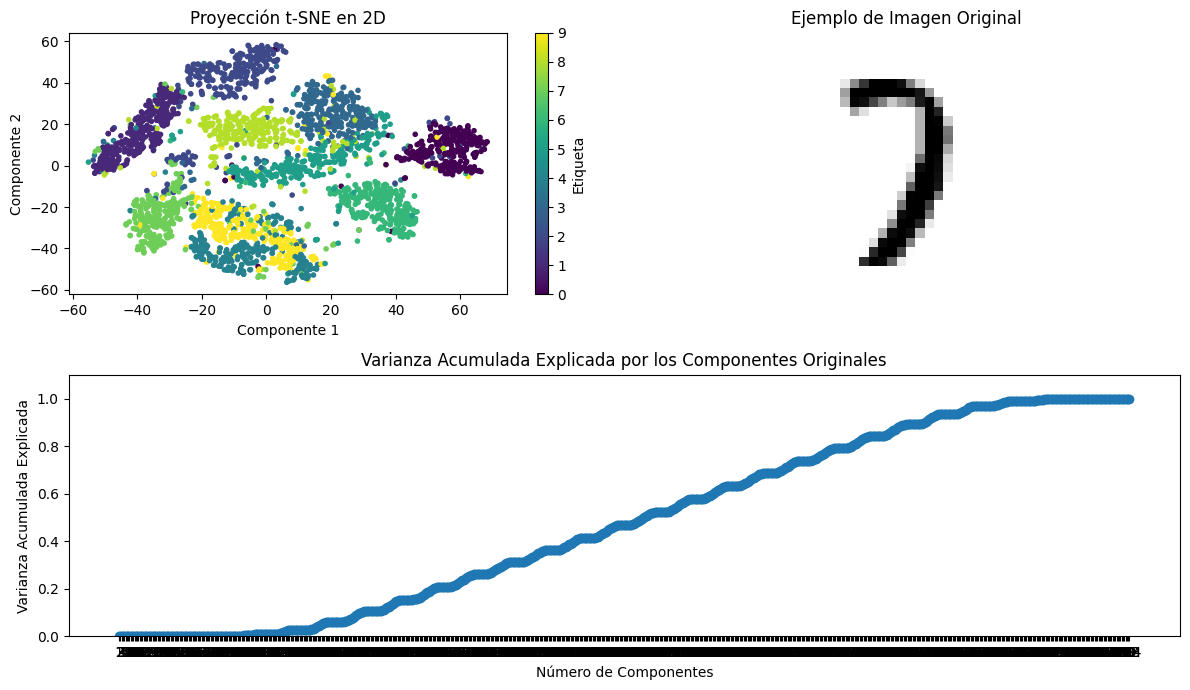

In [3]:
# Elegir un subconjunto de datos para reducir el tiempo de cálculo
subset_indices = np.random.choice(X.shape[0], size=3000, replace=False)
X_subset = X.to_numpy()[subset_indices]
y_subset = y.to_numpy()[subset_indices]

# Aplicar t-SNE para reducir la dimensionalidad a 2 componentes
tsne = TSNE(n_components=2, random_state=42)
X_tsne = tsne.fit_transform(X_subset)

# Calcular la varianza acumulada explicada por los componentes originales
original_variance = np.var(X_subset, axis=0)
explained_variance_ratio = np.cumsum(original_variance) / np.sum(original_variance)

# Visualizar los resultados de t-SNE y la varianza acumulada
plt.figure(figsize=(12, 7))

# Proyección t-SNE en 2D
plt.subplot(2, 2, 1)
plt.scatter(X_tsne[:, 0], X_tsne[:, 1], c=y_subset.astype(int), cmap="viridis", marker='.')
plt.colorbar(label="Etiqueta")
plt.title("Proyección t-SNE en 2D")
plt.xlabel("Componente 1")
plt.ylabel("Componente 2")

# Ejemplo de imagen original
image_example = X_subset[0].reshape(28, 28)
plt.subplot(2, 2, 2)
plt.imshow(image_example, cmap="binary")
plt.title("Ejemplo de Imagen Original")
plt.axis("off")

# Varianza acumulada explicada
plt.subplot(2, 1, 2)
plt.plot(range(1, X_subset.shape[1] + 1), explained_variance_ratio, marker='o')
plt.title("Varianza Acumulada Explicada por los Componentes Originales")
plt.xlabel("Número de Componentes")
plt.ylabel("Varianza Acumulada Explicada")
plt.xticks(range(1, X_subset.shape[1] + 1))
plt.ylim(0, 1.1)

plt.tight_layout()
plt.show()